<a href="https://colab.research.google.com/github/ltardap/Visualizaci-nDatos-PEC2/blob/main/PEC2_Bump_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PEC 2 - Bump Chart - Laura Tardà *Pérez*

Asignatura Visualización de datos

In [1]:
# Importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta con el archivo con los datos
data = pd.read_csv('/content/drive/MyDrive/VisualizacionDatos/games2020.csv')

<ipython-input-4-cd77d868e7ea>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bump_chart_data = bump_chart_data.fillna(method='ffill').fillna(method='bfill')


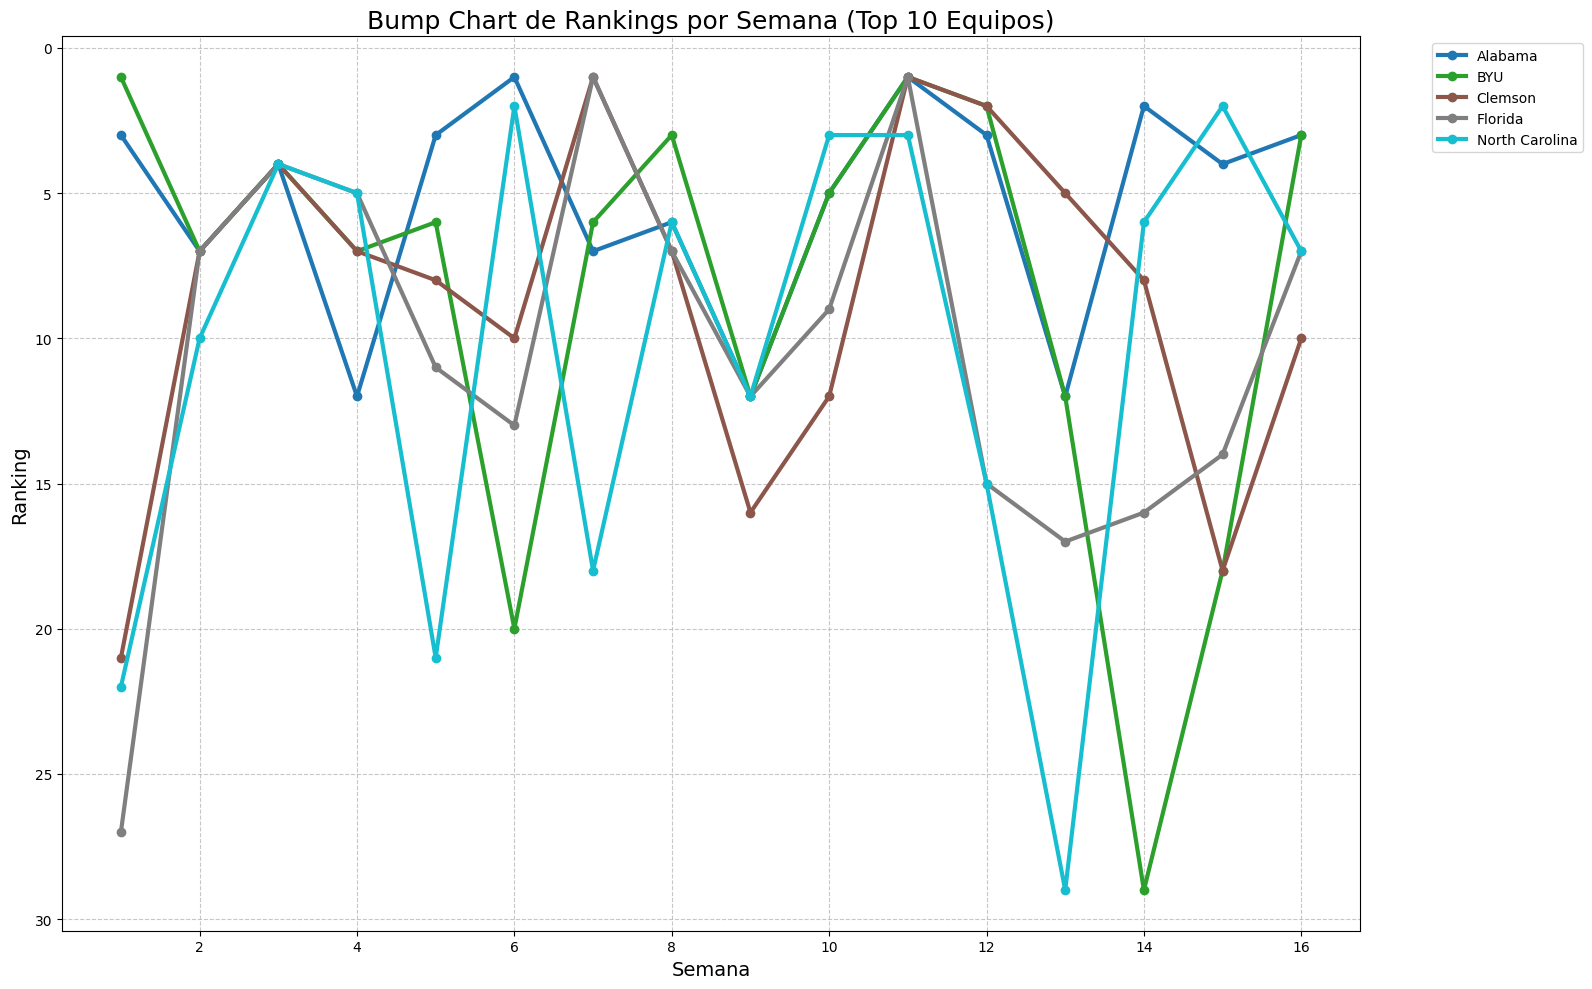

In [4]:
# Extraer datos relevantes para crear el Bump Chart
home_data = data[['week', 'home_team', 'home_points']].rename(columns={'home_team': 'team', 'home_points': 'points'})
away_data = data[['week', 'away_team', 'away_points']].rename(columns={'away_team': 'team', 'away_points': 'points'})

# Combinar los datos de equipos locales y visitantes
combined_data = pd.concat([home_data, away_data])

# Calcular puntos totales por equipo en cada semana
weekly_points = combined_data.groupby(['week', 'team'])['points'].sum().reset_index()

# Calcular rankings semanales para cada equipo basado en sus puntos totales
weekly_points['rank'] = weekly_points.groupby('week')['points'].rank(method='dense', ascending=False)

# Seleccionar solo los 5 mejores equipos para mayor claridad
top_teams = weekly_points.groupby('team')['points'].sum().nlargest(5).index
weekly_points_top = weekly_points[weekly_points['team'].isin(top_teams)]

# Preparar los datos para el Bump Chart
bump_chart_data = weekly_points_top.pivot(index='team', columns='week', values='rank')

# Rellenar valores faltantes para asegurar continuidad en las líneas
bump_chart_data = bump_chart_data.fillna(method='ffill').fillna(method='bfill')

# Generar el Bump Chart
plt.figure(figsize=(16, 10))

# Usar un ciclo de colores para distinguir mejor las líneas
colors = plt.cm.tab10(np.linspace(0, 1, len(bump_chart_data.index)))

for i, team in enumerate(bump_chart_data.index):
    plt.plot(bump_chart_data.columns, bump_chart_data.loc[team], marker='o',
             linewidth=3, label=team, color=colors[i])

plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el rango 1 en la parte superior
plt.title('Bump Chart de Rankings por Semana (Top 10 Equipos)', fontsize=18)
plt.xlabel('Semana', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()
